<a href="https://colab.research.google.com/github/YOUGALAKSHMI/Happy-number/blob/main/Music_Genre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**DATA** **PREPROCESSING**

In [ ]:
MUSIC=pd.read_csv("/content/drive/MyDrive/data.csv",encoding='latin-1')

In [ ]:
MUSIC.shape

(1048575, 7)

In [ ]:
MUSIC.columns

Index(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'Date', 'Region'], dtype='object')

In [ ]:
len(MUSIC.columns)

7

In [ ]:
MUSIC.isnull().sum()

Position        1
Track Name    191
Artist        191
Streams       104
URL             1
Date            1
Region          1
dtype: int64

In [ ]:
MUSIC.Position.fillna("unknown")

0              1.0
1              2.0
2              3.0
3              4.0
4              5.0
            ...   
1048570       56.0
1048571       57.0
1048572       58.0
1048573       59.0
1048574    unknown
Name: Position, Length: 1048575, dtype: object

In [ ]:
MUSIC.Streams.fillna("unknown")

0          19272.0
1          19270.0
2          15761.0
3          14954.0
4          14269.0
            ...   
1048570    23883.0
1048571    23649.0
1048572    22654.0
1048573    21903.0
1048574    unknown
Name: Streams, Length: 1048575, dtype: object

In [ ]:
MUSIC.URL.fillna("unknown")

0          https://open.spotify.com/track/3AEZUABDXNtecAO...
1          https://open.spotify.com/track/6mICuAdrwEjh6Y6...
2          https://open.spotify.com/track/3QwBODjSEzelZyV...
3          https://open.spotify.com/track/7DM4BPaS7uofFul...
4          https://open.spotify.com/track/6rQSrBHf7HlZjtc...
                                 ...                        
1048570    https://open.spotify.com/track/0sXvAOmXgjR2QUq...
1048571    https://open.spotify.com/track/3ebXMykcMXOcLeJ...
1048572    https://open.spotify.com/track/1MpKZi1zTXpERKw...
1048573    https://open.spotify.com/track/1VRjHqcE8ttKtaj...
1048574                                              unknown
Name: URL, Length: 1048575, dtype: object

In [ ]:
MUSIC.Date.fillna("unknown")

0           1/1/2017
1           1/1/2017
2           1/1/2017
3           1/1/2017
4           1/1/2017
             ...    
1048570    3/19/2017
1048571    3/19/2017
1048572    3/19/2017
1048573    3/19/2017
1048574      unknown
Name: Date, Length: 1048575, dtype: object

In [ ]:
MUSIC.Region.fillna("unknown")

0               ec
1               ec
2               ec
3               ec
4               ec
            ...   
1048570         cl
1048571         cl
1048572         cl
1048573         cl
1048574    unknown
Name: Region, Length: 1048575, dtype: object

In [ ]:
MUSIC.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1.0,Reggaetón Lento (Bailemos),CNCO,19272.0,https://open.spotify.com/track/3AEZUABDXNtecAO...,1/1/2017,ec
1,2.0,Chantaje,Shakira,19270.0,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,1/1/2017,ec
2,3.0,Otra Vez (feat. J Balvin),Zion & Lennox,15761.0,https://open.spotify.com/track/3QwBODjSEzelZyV...,1/1/2017,ec
3,4.0,Vente Pa' Ca,Ricky Martin,14954.0,https://open.spotify.com/track/7DM4BPaS7uofFul...,1/1/2017,ec
4,5.0,Safari,J Balvin,14269.0,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,1/1/2017,ec


In [ ]:
MUSIC.tail()

,Position,Track Name,Artist,Streams,URL,Date,Region
1048570,56.0,La Bicicleta,Carlos Vives,23883.0,https://open.spotify.com/track/0sXvAOmXgjR2QUq...,3/19/2017,cl
1048571,57.0,Scared to Be Lonely,Martin Garrix,23649.0,https://open.spotify.com/track/3ebXMykcMXOcLeJ...,3/19/2017,cl
1048572,58.0,Cuando Se Pone a Bailar,Rombai,22654.0,https://open.spotify.com/track/1MpKZi1zTXpERKw...,3/19/2017,cl
1048573,59.0,De Vez en Cuando,"Franco ""El Gorilla""",21903.0,https://open.spotify.com/track/1VRjHqcE8ttKtaj...,3/19/2017,cl
1048574,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
MUSIC.describe()

,Position,Streams
count,1.048574e+06,1.048471e+06
mean,9.671629e+01,4.839170e+04
std,5.812127e+01,1.145449e+05
min,1.000000e+00,1.001000e+03
25%,4.600000e+01,5.542000e+03
50%,9.500000e+01,1.523400e+04
75%,1.470000e+02,3.690200e+04
max,2.000000e+02,4.068152e+06


In [ ]:
MUSIC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Position    1048574 non-null  float64
 1   Track Name  1048384 non-null  object 
 2   Artist      1048384 non-null  object 
 3   Streams     1048471 non-null  float64
 4   URL         1048574 non-null  object 
 5   Date        1048574 non-null  object 
 6   Region      1048574 non-null  object 
dtypes: float64(2), object(5)
memory usage: 56.0+ MB


**DATA** **ANALYSIS**

# TOP FIVE ARTIST





In [ ]:
top_artist=MUSIC.groupby("Artist").count().sort_values(by="Track Name",ascending=False)["Track Name"][:5]
top_artist

Artist
Ed Sheeran          32935
The Chainsmokers    19886
Drake               13392
Calvin Harris       10984
Imagine Dragons     10608
Name: Track Name, dtype: int64

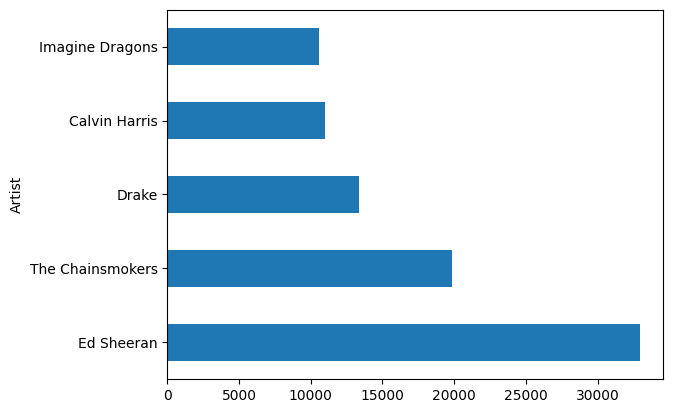

In [ ]:
top_artist.plot.barh()
plt.show()

# TOP FIVE TRACK NAME

In [ ]:
top_TrackName=MUSIC.groupby("Track Name").count().sort_values(by="Artist",ascending=False)["Artist"][:5]
top_TrackName

Track Name
Shape of You                          5733
????                                  5582
Believer                              4933
Despacito (Featuring Daddy Yankee)    4752
Something Just Like This              4714
Name: Artist, dtype: int64

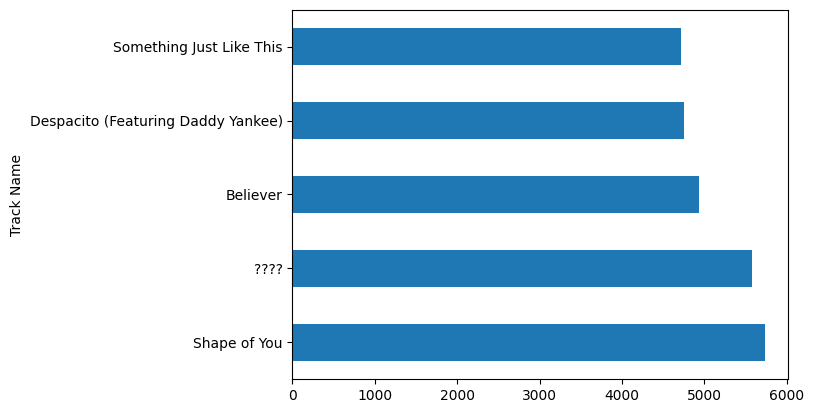

In [ ]:
top_TrackName.plot.barh()
plt.show()

#TOP FIVE TRACK POSITION

In [ ]:
top_track_position=MUSIC[["Position","Track Name","Artist"]].sort_values(by="Position",ascending=False)[:5]
top_track_position

,Position,Track Name,Artist
390999,200.0,Touch,Little Mix
645198,200.0,I Took A Pill In Ibiza - Seeb Remix,Mike Posner
244999,200.0,Sireenit,Evelina
1033114,200.0,Wonderwall - Remastered,Oasis
88199,200.0,Les princes,MZ


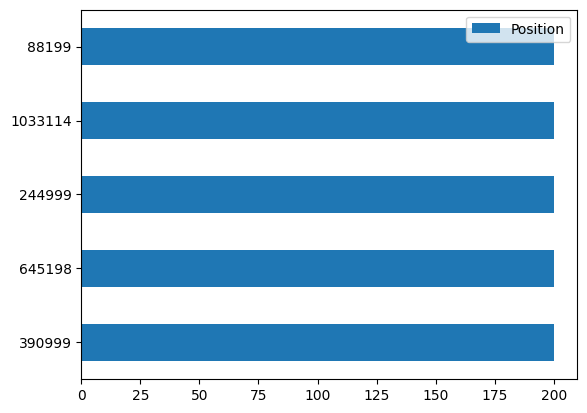

In [ ]:
top_track_position.plot.barh()
plt.show()

**DATA VISUVALIZATION**

In [ ]:
import seaborn as sns

<ipython-input-32-4cc98874361d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(MUSIC.corr(),annot=True)


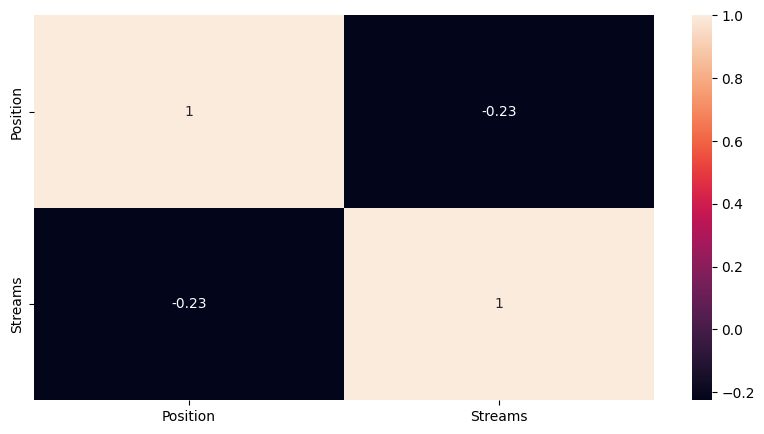

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(MUSIC.corr(),annot=True)
#sns.heatmap(MUSIC.corr())
plt.show()

In [ ]:
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
MUSIC['Track Name'] = le.fit_transform(MUSIC['Track Name'])
MUSIC.head()

,Position,Track Name,Artist,Streams,URL,Region
Date,,,,,,
2017-01-01,1.0,6696,CNCO,19272.0,https://open.spotify.com/track/3AEZUABDXNtecAO...,ec
2017-01-01,2.0,1522,Shakira,19270.0,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,ec
2017-01-01,3.0,6086,Zion & Lennox,15761.0,https://open.spotify.com/track/3QwBODjSEzelZyV...,ec
2017-01-01,4.0,8540,Ricky Martin,14954.0,https://open.spotify.com/track/7DM4BPaS7uofFul...,ec
2017-01-01,5.0,6932,J Balvin,14269.0,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,ec


In [ ]:
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
MUSIC['Artist'] = le.fit_transform(MUSIC['Artist'])
MUSIC.head()

,Position,Track Name,Artist,Streams,URL,Region
Date,,,,,,
2017-01-01,1.0,6696,485,19272.0,https://open.spotify.com/track/3AEZUABDXNtecAO...,ec
2017-01-01,2.0,1522,2724,19270.0,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,ec
2017-01-01,3.0,6086,3288,15761.0,https://open.spotify.com/track/3QwBODjSEzelZyV...,ec
2017-01-01,4.0,8540,2535,14954.0,https://open.spotify.com/track/7DM4BPaS7uofFul...,ec
2017-01-01,5.0,6932,1344,14269.0,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,ec


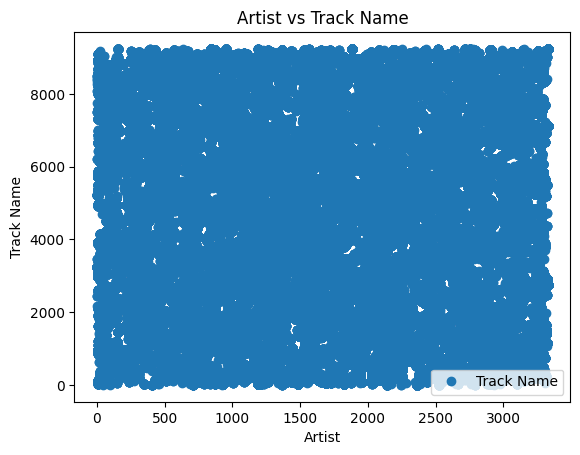

In [ ]:
MUSIC.plot(x='Artist',y='Track Name',style='o')
plt.title('Artist vs Track Name')
plt.xlabel('Artist')
plt.ylabel('Track Name')
plt.show()

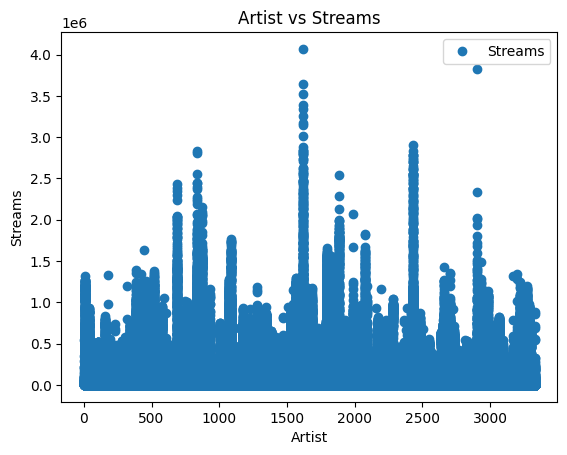

In [ ]:
MUSIC.plot(x='Artist',y='Streams',style='o')
plt.title('Artist vs Streams')
plt.xlabel('Artist')
plt.ylabel('Streams')
plt.show()

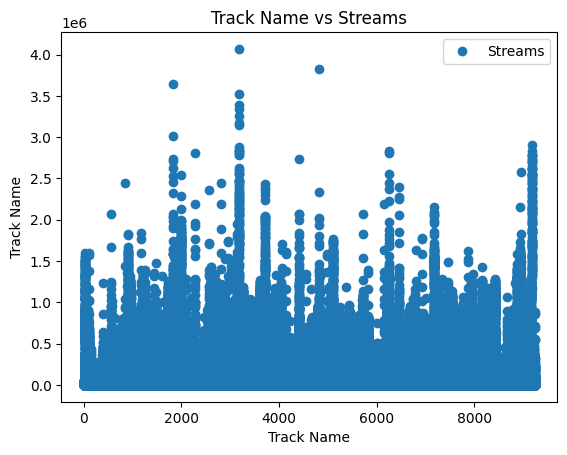

In [ ]:
MUSIC.plot(x='Track Name',y='Streams',style='o')
plt.title('Track Name vs Streams')
plt.xlabel('Track Name')
plt.ylabel('Track Name')
plt.show()

In [ ]:
MUSIC.Streams.value_counts()

1019.0      127
2575.0      119
1027.0      115
2484.0      114
1075.0      112
           ... 
242417.0      1
247608.0      1
251143.0      1
251321.0      1
55471.0       1
Name: Streams, Length: 183522, dtype: int64

In [ ]:
MUSIC.Artist.value_counts()

871     32935
2930    19886
833     13392
496     10984
1314    10608
        ...  
2488        1
2373        1
1365        1
170         1
134         1
Name: Artist, Length: 3330, dtype: int64